# || The Sparks Foundation || GRIPDEC20 DSBA Task 5

# Author: Meenakshi Vashistha

### EDA-Sports

#### ● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 
#### ● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 


![](ipl.jpg)

#### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### reading datasets

In [2]:
matches=pd.read_csv('matches.csv')

In [3]:
delivery=pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
delivery.isnull().mean()

match_id            0.000000
inning              0.000000
batting_team        0.000000
bowling_team        0.000000
over                0.000000
ball                0.000000
batsman             0.000000
non_striker         0.000000
bowler              0.000000
is_super_over       0.000000
wide_runs           0.000000
bye_runs            0.000000
legbye_runs         0.000000
noball_runs         0.000000
penalty_runs        0.000000
batsman_runs        0.000000
extra_runs          0.000000
total_runs          0.000000
player_dismissed    0.950670
dismissal_kind      0.950670
fielder             0.963993
dtype: float64

In [20]:
delivery.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [6]:
matches.shape

(756, 18)

In [7]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [8]:
matches.isnull().mean()

id                 0.000000
season             0.000000
city               0.009259
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.005291
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.005291
venue              0.000000
umpire1            0.002646
umpire2            0.002646
umpire3            0.842593
dtype: float64

In [9]:
matches=matches.drop(['id'], axis=1)

#### Highest number of matches at which place ????

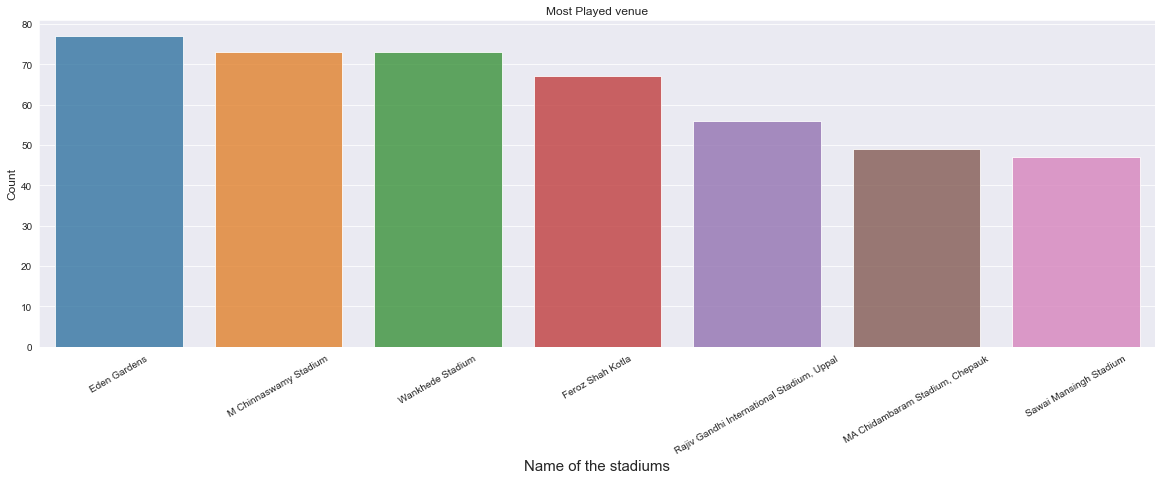

In [10]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")# to make background with grid
ls=matches['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()

#### How many matches are played in different seasons

Text(0.5, 0, 'Season')

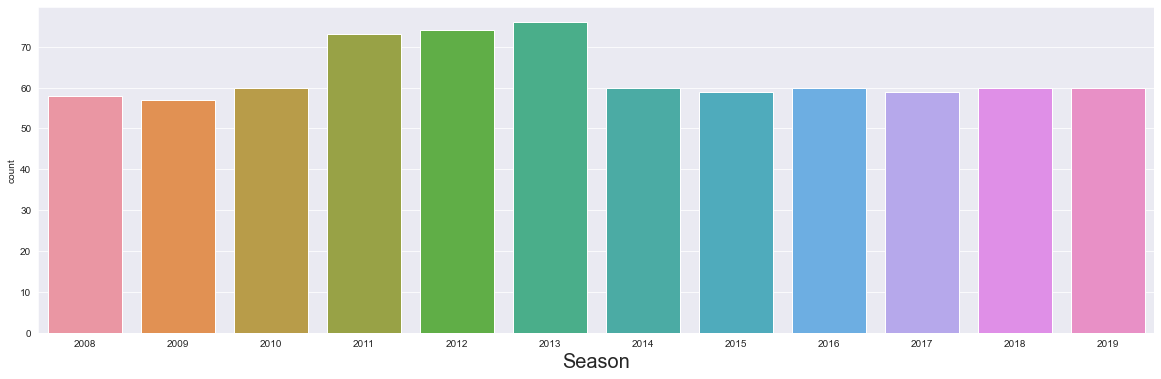

In [11]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=matches)
plt.xlabel('Season',fontsize=20)

#### Top teams which won the matches

In [12]:
winner=matches.winner.value_counts()

In [13]:
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

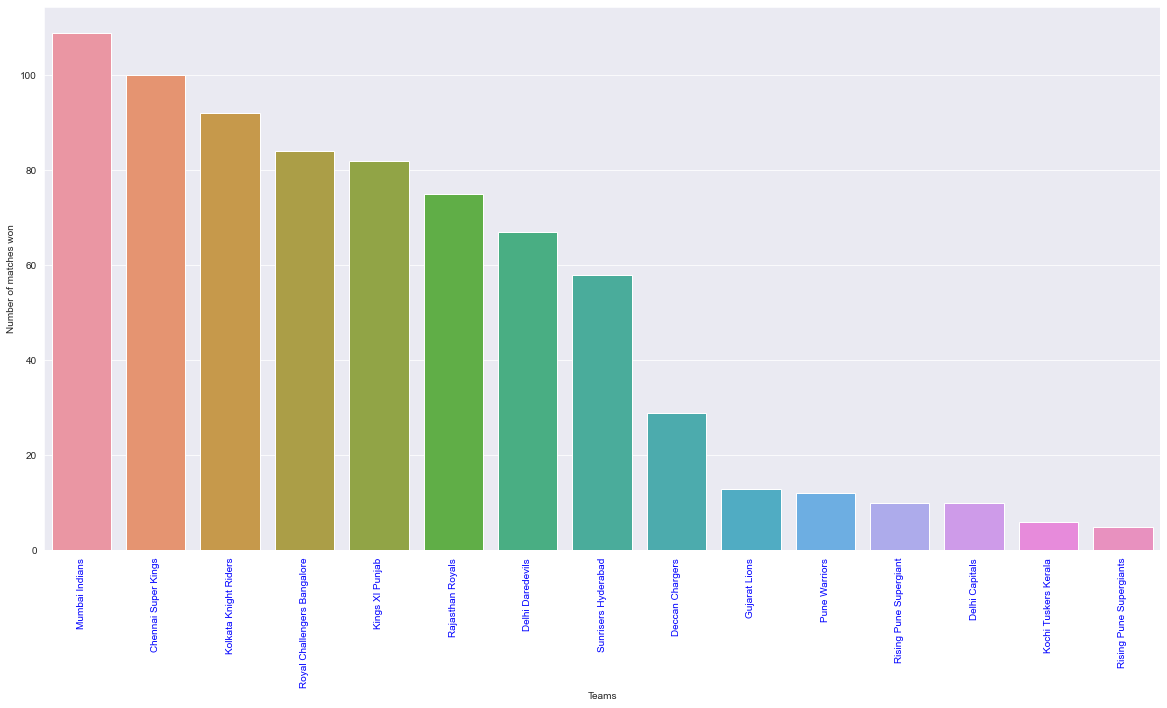

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x=winner.index, y=winner.values)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Number of matches won')
plt.gca().tick_params(axis='x', labelcolor='blue')

![](top_team_mumbai_indians.jpg)

#### Man of the Match !!!

In [15]:
Top_players=matches.player_of_match.value_counts()

In [16]:
Top_players

CH Gayle             21
AB de Villiers       20
MS Dhoni             17
RG Sharma            17
DA Warner            17
                     ..
Imran Tahir           1
Kuldeep Yadav         1
KMDN Kulasekara       1
BCJ Cutting           1
Mustafizur Rahman     1
Name: player_of_match, Length: 226, dtype: int64

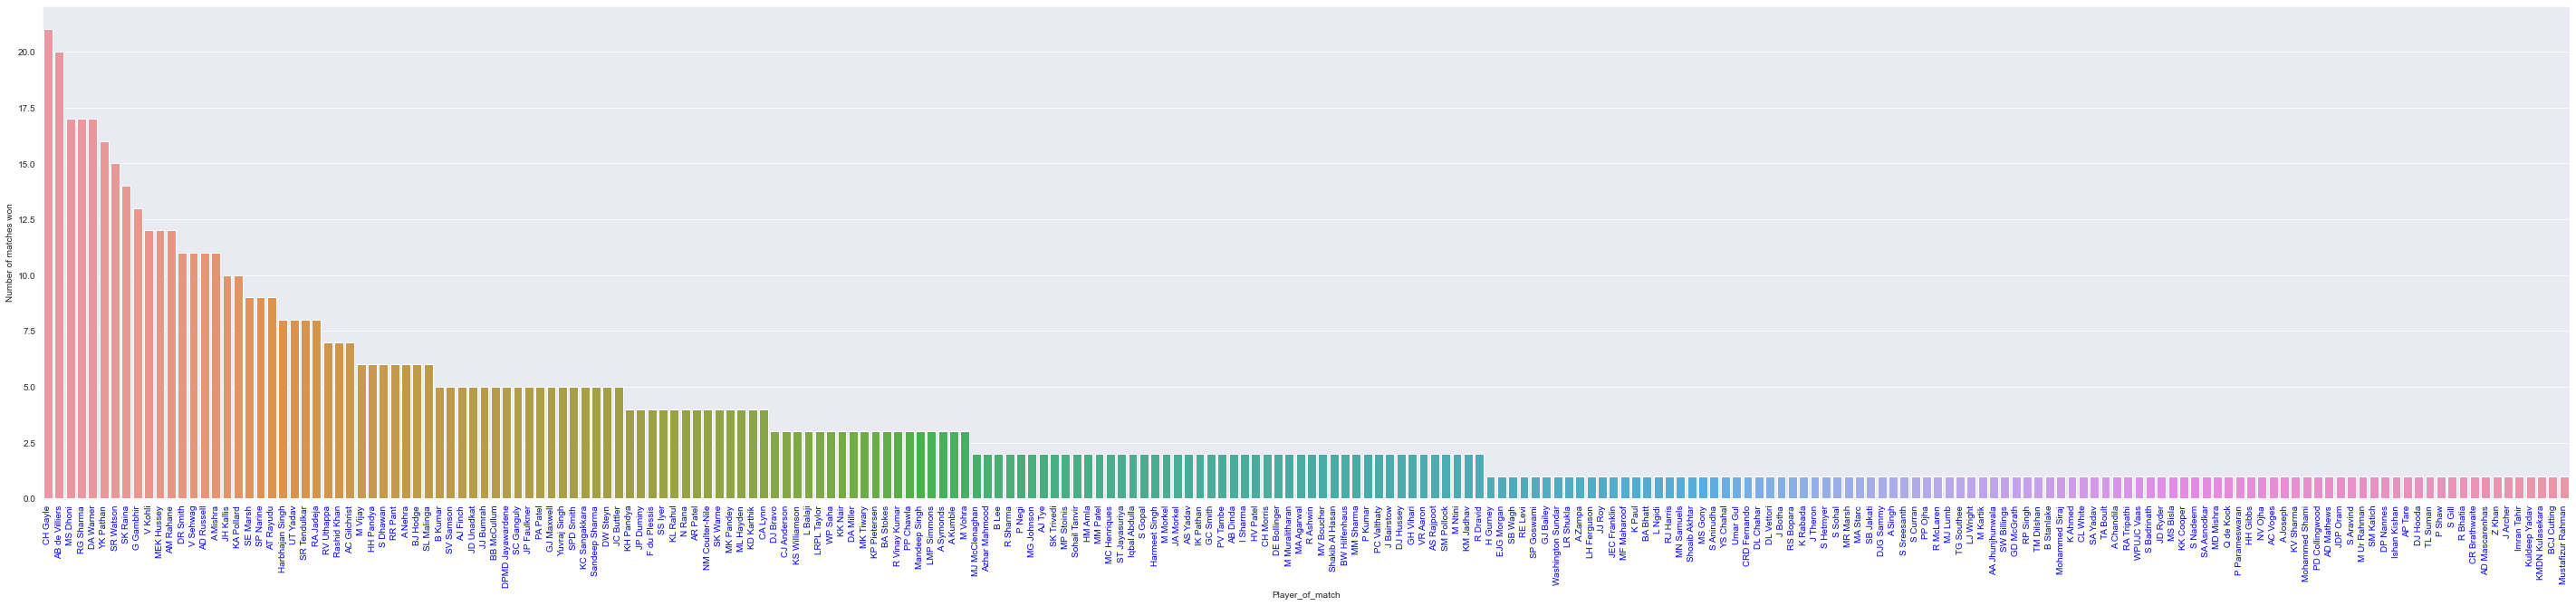

In [17]:
plt.figure(figsize=(50,10))
sns.barplot(x=Top_players.index, y=Top_players.values)
plt.xticks(rotation=90)
plt.xlabel('Player_of_match')
plt.ylabel('Number of matches won')
plt.gca().tick_params(axis='x', labelcolor='blue')

![](player_gayle.jpg)

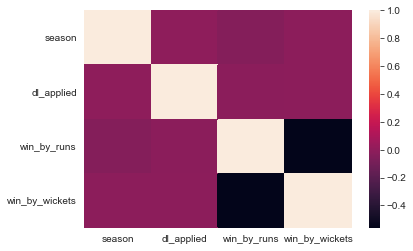

In [18]:
sns.heatmap(matches.corr())